In [1]:
# Build an autoencoder model to learn low-dimensional representations of data.

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the dimensions of the encoding layer
encoding_dim = 2  # Size of the reduced representation

# Input layer
input_layer = Input(shape=(64,))  # Using 64-dimensional input for digit data

# Encoder layers
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder layers
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='sigmoid')(decoded)

# Define the autoencoder model
autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64)]              0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
Total params: 4,354
Trainable params: 4,354
Non-trainable params: 0
_________________________________________________________________


In [2]:
# Train the autoencoder on high-dimensional data to learn compressed representations.

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset and prepare train/test splits
data = load_digits()
X_train, X_test = train_test_split(data.data, test_size=0.2, random_state=42)

# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/50
6/6 [==============================] - 1s 57ms/step - loss: 55.5746 - val_loss: 54.7849
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 55.5560 - val_loss: 54.7677
Epoch 3/50
6/6 [==============================] - 0s 8ms/step - loss: 55.5383 - val_loss: 54.7493
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 55.5190 - val_loss: 54.7291
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 55.4979 - val_loss: 54.7068
Epoch 6/50
6/6 [==============================] - 0s 11ms/step - loss: 55.4745 - val_loss: 54.6821
Epoch 7/50
6/6 [==============================] - 0s 10ms/step - loss: 55.4487 - val_loss: 54.6547
Epoch 8/50
6/6 [==============================] - 0s 8ms/step - loss: 55.4200 - val_loss: 54.6245
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 55.3885 - val_loss: 54.5913
Epoch 10/50
6/6 [==============================] - 0s 9ms/step - loss: 55.3538 - val_loss: 54.5549
Epoch 11/50
6/6

12/12 [==============================] - 0s 1ms/step


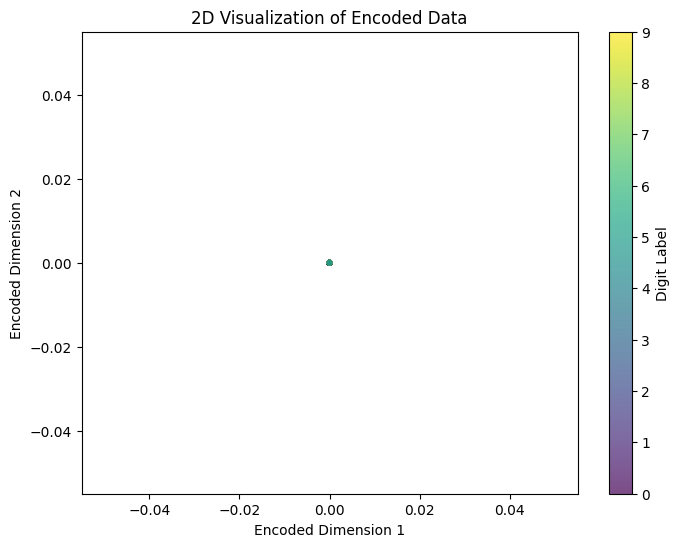

In [3]:
# Use the encoder part of the autoencoder to visualize data in reduced dimensions.

# Define the encoder model to capture the encoded representations
encoder = Model(inputs=autoencoder.input, outputs=autoencoder.layers[2].output)
encoded_data = encoder.predict(X_test)

# Plot the encoded (compressed) representations
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=data.target[train_test_split(range(len(data.data)), test_size=0.2, random_state=42)[1]], cmap='viridis', s=10, alpha=0.7)
plt.colorbar(label="Digit Label")
plt.title("2D Visualization of Encoded Data")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

In [4]:
# Use reconstruction error to detect anomalies, as anomalies typically have higher reconstruction errors.

import numpy as np

# Get reconstructed test data
reconstructed_data = autoencoder.predict(X_test)

# Calculate reconstruction error
reconstruction_error = np.mean((X_test - reconstructed_data) ** 2, axis=1)

# Define an anomaly threshold
threshold = np.percentile(reconstruction_error, 95)

# Identify anomalies
anomalies = reconstruction_error > threshold
print(f"Number of anomalies detected: {np.sum(anomalies)}")

12/12 [==============================] - 0s 1ms/step
Number of anomalies detected: 18


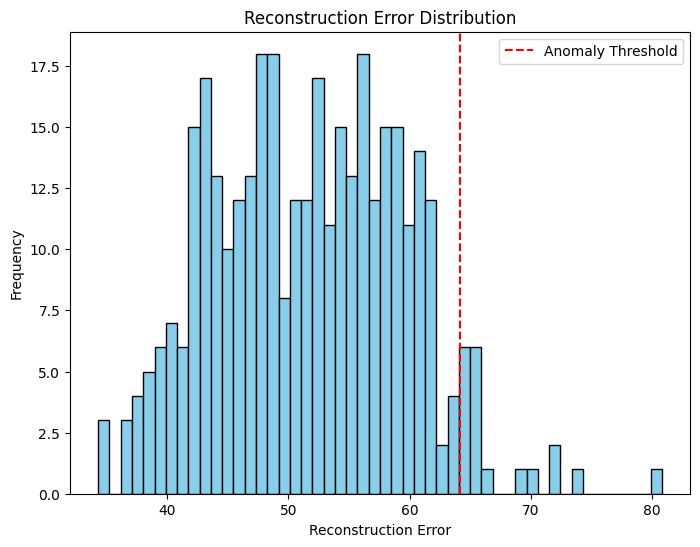

In [5]:
# Visualize reconstruction error distribution to observe separation between normal data and anomalies.

plt.figure(figsize=(8, 6))
plt.hist(reconstruction_error, bins=50, color='skyblue', edgecolor='black')
plt.axvline(threshold, color='red', linestyle='--', label='Anomaly Threshold')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()